# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

Ans: 神经元计算，模仿生物神经元的生物机理，简化出一种计算模型，接收多个输入，对每个输入乘上一个权重值，加上一个偏移量 ，然后在输出上加个激活函数，这样的计算过程便是神经元计算。

####  2. Why we use non-linear activation funcitons in neural networks?

Ans： 一方面是因为没有非线性激活函数的神经网络输出的值只能是线性的，而现实中很多情况是非线性的，在神经网络中加入非线性激活函数才更好地拟合现实中非线性的情况。
    另一方面多层神经网络中，层与层之间若没有非线性激活函数相连，那么多层神经网络可以简化为一层。


#### 3. What is the 'Logistic Loss' ?

Ans: 逻辑回归模型使用的Loss函数为Logistic Loss函数

$$ LogisticLoss = - y log \hat y - (1 - y)log(1 - \hat y)  $$

$$ \hat y 是模型预测值， y是真实值 $$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

Ans: 二分类输出概率，选择C sigmoid 

#### 5. Why we don't use zero initialization for all parameters ?

Ans： 对于WX + b，对W矩阵的初始化不使用全0来初始化，是因为全0会导致所有的梯度下降反向传递后各个分支的W值完全相同，然后难以收敛到一个期望的状态。对于b来说则无所谓，全0初始化也没关系。

#### 6. Can you implement the softmax function using python ? 

softmax 函数输入输出都是至少是个一维向量，并且输入向量和输出向量的维度是相等的。
其中输入向量Z ,输出Y，z和y为Z和Y中的元素

##  $$ y_n = \frac {  e^{z_n}  }{  \sum_{j=1}^m {e^{z_j}}  } $$

n ： 当前的第n个元素

m ： 输入的元素个数

In [3]:
import math

def softmax(Z:[]):
    sumValue = sum([math.e ** z for z in Z])
    return [math.e ** z / sumValue for z in Z]

print(softmax([1,2,3,4,5]))
print(sum(softmax([1,2,3,4,5])))
print(softmax([1,2,3,4,5, -5]))
print(sum(softmax([1,2,3,4,5, -5])))

[0.011656230956039609, 0.03168492079612427, 0.0861285444362687, 0.23412165725273662, 0.6364086465588308]
1.0
[0.011655894183363012, 0.03168400535307716, 0.08612605600406874, 0.2341148929927061, 0.6363902593937069, 2.889207307800382e-05]
0.9999999999999999


### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


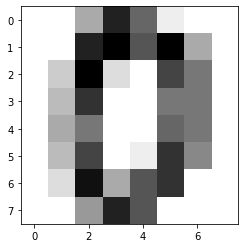

In [32]:
# Loading the data 
digits = datasets.load_digits()
print(len(digits.data))
print(digits.data[0])
plt.imshow(digits.data[0].reshape([8,8]),cmap=plt.cm.gray_r)

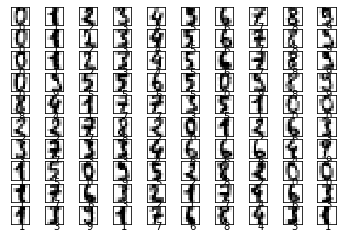

In [40]:
# Vilizating the data
count = 100
for i in range(0, count):
    plt.subplot(count / 10, 10,i+1)
    plt.imshow(digits.data[i].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [42]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1347
450
1347
450


In [43]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [45]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [59]:
import numpy as np

In [60]:

def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1 / (1 + np.e**-z)
    
    return s

print(sigmoid(-float('inf')))
print(sigmoid(-3))
print(sigmoid(-2))
print(sigmoid(-0.5))
print(sigmoid(0))
print(sigmoid(0.5))
print(sigmoid(float('inf')))

0.0
0.04742587317756679
0.11920292202211757
0.3775406687981454
0.5
0.6224593312018546
1.0


In [61]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [135]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = 0.00005
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

w,b = initialize_parameters(64)
w,b

(array([[-2.01500966],
        [ 0.53639962],
        [-0.50617402],
        [ 1.27720026],
        [-1.18160265],
        [ 0.12140143],
        [-1.29950277],
        [ 0.07358587],
        [-0.36521343],
        [ 1.29482372],
        [-0.61142739],
        [-0.73093048],
        [ 0.70050572],
        [-0.68236933],
        [-0.17325968],
        [ 0.6037009 ],
        [ 0.44831095],
        [ 0.68293564],
        [-0.85312326],
        [-2.2183101 ],
        [ 0.05273869],
        [-0.48121778],
        [ 0.71296621],
        [ 0.1430395 ],
        [-0.84843656],
        [-1.51854637],
        [ 1.3104743 ],
        [ 0.02216182],
        [ 1.03475104],
        [ 0.41421462],
        [ 1.68217229],
        [ 0.08816716],
        [-0.67812601],
        [-0.31018549],
        [-0.95984678],
        [ 0.34597767],
        [-0.17743662],
        [-0.46527971],
        [ 0.03965588],
        [-0.09686509],
        [-0.543477  ],
        [-0.90753426],
        [ 1.62599986],
        [-0

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [137]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
#     print(m, "w.shape", w.shape, 'X.shape', X.shape)
    A = sigmoid(np.dot(X, w) + b).reshape(-1)
#     print("A.shape", A.shape, "Y.shape", Y.shape, (A - Y).shape)
    cost = -1/m * np.sum([y * np.log(a) + (1 - y)* np.log(1 - a) for y, a in zip(Y, A)])
    
    dw = 1/m * np.dot(X.T , (A - Y)).reshape(-1,1)
#     print("dw.shape", dw.shape)
    db = 1/m * np.sum([a - y for y, a in zip(Y, A)])
#     print("db", db)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

# grads, cost = propagate(w,b,X_train[:30],y_train[:30])
grads, cost = propagate(w,b,X_train,y_train)
grads, cost

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


({'dw': array([[ 0.00000000e+00],
         [ 2.21991044e+00],
         [ 3.20696308e+01],
         [ 6.82703984e+01],
         [ 6.17428181e+01],
         [ 4.83166789e+00],
         [-1.16758458e+01],
         [-1.57124691e+00],
         [ 2.91286405e-02],
         [ 1.51219093e+01],
         [ 5.42337678e+01],
         [ 6.80920590e+01],
         [ 7.71700746e+01],
         [ 4.24595710e+01],
         [-3.38169422e+00],
         [-3.39532224e-01],
         [ 3.12500000e-02],
         [ 1.47272146e+01],
         [ 4.61361124e+01],
         [ 4.94428489e+01],
         [ 6.57563844e+01],
         [ 5.07232836e+01],
         [ 1.21547278e+01],
         [ 4.64820941e-01],
         [ 1.92472223e-25],
         [ 1.28133479e+01],
         [ 4.09808610e+01],
         [ 3.96261883e+01],
         [ 5.61046238e+01],
         [ 4.34679674e+01],
         [ 1.89545642e+01],
         [ 3.12500000e-02],
         [ 0.00000000e+00],
         [ 1.84846025e+01],
         [ 3.24113272e+01],
         [ 2.4

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [139]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

params, grads, costs = optimize(w,b,X_train,y_train, 2000, 0.001, print_cost=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: 9.606195
Cost after iteration 800: 8.661677
Cost after iteration 900: 7.905963
Cost after iteration 1000: 7.402149
Cost after iteration 1100: 9.115968
Cost after iteration 1200: 10.254528
Cost after iteration 1300: 8.911429
Cost after iteration 1400: 7.637394
Cost after iteration 1500: 6.616276
Cost after iteration 1600: 6.442655
Cost after iteration 1700: 6.319635
Cost after iteration 1800: 6.228379
Cost after iteration 1900: 6.170557


###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [140]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X, w) + b).reshape(-1)
    
    for i in range(A.shape[0]):
        Y_prediction[0][i] = 1 if A[i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

Y_prediction = predict(params['w'], params['b'], X_test)
Y_prediction == y_test

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True, False,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True, False, False,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [117]:
from collections import Counter

In [200]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    w,b = initialize_parameters(X_train.shape[1])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=print_cost)
    
    Y_prediction = predict(params['w'], params['b'], X_train)
    counter = Counter(list((Y_prediction == Y_train).reshape(-1)))
    print(counter)
    traing_accuracy = counter[True]/len(Y_train)
    
    Y_prediction = predict(params['w'], params['b'], X_test)
    counter = Counter(list((Y_prediction == Y_test).reshape(-1)))
    print(counter)
    test_accuracy = counter[True]/len(Y_test)
    
    return {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":costs}

result = model(X_train, y_train, X_test, y_test, 5000, 0.001, print_cost=False)
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Counter({True: 1200, False: 147})
Counter({True: 386, False: 64})


{'w': array([[ 1.33673857],
        [ 1.59298726],
        [ 0.51346661],
        [-0.86312536],
        [ 1.10432019],
        [ 0.06086872],
        [ 1.66827423],
        [-0.25193959],
        [-0.06721052],
        [-0.20878884],
        [-0.04283784],
        [-2.32510607],
        [ 2.11276406],
        [ 0.15470166],
        [ 0.06681873],
        [-0.43681655],
        [-1.23360354],
        [ 0.68563972],
        [-1.99576039],
        [ 0.61538663],
        [-0.76724765],
        [ 0.92882848],
        [-1.02509691],
        [ 1.11374444],
        [-1.27474492],
        [-0.01536492],
        [-1.19688636],
        [-1.35050504],
        [-1.03302505],
        [ 0.78759415],
        [-1.57501111],
        [-0.38908091],
        [-1.23871213],
        [ 1.22640845],
        [-0.63536842],
        [-2.33562571],
        [ 0.41119595],
        [ 0.69556725],
        [-0.40571587],
        [-0.54364368],
        [ 0.31175355],
        [-0.56089784],
        [-0.50741038],
      

In [198]:
import matplotlib.pyplot as plt

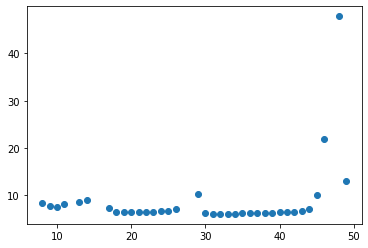

In [202]:
plt.scatter(range(len(result['cost'])), result['cost'])

### 用keras 看下能做到那一步

In [145]:
import keras

In [205]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['mse'])

model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
1347/1347 [==============================] - 1s 791us/step - loss: 1.0369 - mean_squared_error: 0.2334
Epoch 2/500
1347/1347 [==============================] - 0s 99us/step - loss: 0.3115 - mean_squared_error: 0.0944
Epoch 3/500
1347/1347 [==============================] - 0s 67us/step - loss: 0.2251 - mean_squared_error: 0.0636
Epoch 4/500
1347/1347 [==============================] - 0s 57us/step - loss: 0.1838 - mean_squared_error: 0.0502
Epoch 5/500
1347/1347 [==============================] - 0s 57us/step - loss: 0.1673 - mean_squared_error: 0.0458
Epoch 6/500
1347/1347 [==============================] - 0s 56us/step - loss: 0.1597 - mean_squared_error: 0.0443
Epoch 7/500
1347/1347 [==============================] - 0s 57us/step - loss: 0.1352 - mean_squared_error: 0.0366
Epoch 8/500
1347/1347 [==============================] - 0s 59us/step - loss: 0.1269 - mean_squared_error: 0.0329
Epoch 9/500
1347/1347 [==============================] - 0s 64us/step - loss: 0.1152 - 

1347/1347 [==============================] - 0s 56us/step - loss: 0.0094 - mean_squared_error: 0.0010
Epoch 73/500
1347/1347 [==============================] - 0s 56us/step - loss: 0.0088 - mean_squared_error: 7.6984e-04
Epoch 74/500
1347/1347 [==============================] - 0s 56us/step - loss: 0.0089 - mean_squared_error: 8.7154e-04
Epoch 75/500
1347/1347 [==============================] - 0s 57us/step - loss: 0.0088 - mean_squared_error: 8.4335e-04
Epoch 76/500
1347/1347 [==============================] - 0s 56us/step - loss: 0.0100 - mean_squared_error: 0.0012
Epoch 77/500
1347/1347 [==============================] - 0s 64us/step - loss: 0.0086 - mean_squared_error: 7.8735e-04
Epoch 78/500
1347/1347 [==============================] - 0s 59us/step - loss: 0.0083 - mean_squared_error: 7.5825e-04
Epoch 79/500
1347/1347 [==============================] - 0s 55us/step - loss: 0.0080 - mean_squared_error: 6.7447e-04
Epoch 80/500
1347/1347 [==============================] - 0s 56us/ste

1347/1347 [==============================] - 0s 65us/step - loss: 0.0033 - mean_squared_error: 1.1997e-04
Epoch 141/500
1347/1347 [==============================] - 0s 75us/step - loss: 0.0033 - mean_squared_error: 1.1651e-04
Epoch 142/500
1347/1347 [==============================] - 0s 74us/step - loss: 0.0032 - mean_squared_error: 1.0410e-04
Epoch 143/500
1347/1347 [==============================] - 0s 67us/step - loss: 0.0032 - mean_squared_error: 1.1842e-04
Epoch 144/500
1347/1347 [==============================] - 0s 66us/step - loss: 0.0032 - mean_squared_error: 1.1231e-04
Epoch 145/500
1347/1347 [==============================] - 0s 66us/step - loss: 0.0031 - mean_squared_error: 1.0787e-04
Epoch 146/500
1347/1347 [==============================] - 0s 64us/step - loss: 0.0031 - mean_squared_error: 1.0689e-04
Epoch 147/500
1347/1347 [==============================] - 0s 64us/step - loss: 0.0031 - mean_squared_error: 1.0590e-04
Epoch 148/500
1347/1347 [=============================

1347/1347 [==============================] - 0s 59us/step - loss: 0.0019 - mean_squared_error: 3.9028e-05
Epoch 209/500
1347/1347 [==============================] - 0s 64us/step - loss: 0.0019 - mean_squared_error: 3.9194e-05
Epoch 210/500
1347/1347 [==============================] - 0s 61us/step - loss: 0.0019 - mean_squared_error: 3.8077e-05
Epoch 211/500
1347/1347 [==============================] - 0s 58us/step - loss: 0.0019 - mean_squared_error: 3.9293e-05
Epoch 212/500
1347/1347 [==============================] - 0s 54us/step - loss: 0.0019 - mean_squared_error: 3.9050e-05
Epoch 213/500
1347/1347 [==============================] - 0s 56us/step - loss: 0.0018 - mean_squared_error: 3.7537e-05
Epoch 214/500
1347/1347 [==============================] - 0s 56us/step - loss: 0.0018 - mean_squared_error: 3.6397e-05
Epoch 215/500
1347/1347 [==============================] - 0s 54us/step - loss: 0.0018 - mean_squared_error: 3.5480e-05
Epoch 216/500
1347/1347 [=============================

Epoch 276/500
1347/1347 [==============================] - 0s 58us/step - loss: 0.0013 - mean_squared_error: 1.8854e-05
Epoch 277/500
1347/1347 [==============================] - 0s 58us/step - loss: 0.0013 - mean_squared_error: 1.8462e-05
Epoch 278/500
1347/1347 [==============================] - 0s 59us/step - loss: 0.0013 - mean_squared_error: 1.8090e-05
Epoch 279/500
1347/1347 [==============================] - 0s 57us/step - loss: 0.0013 - mean_squared_error: 1.7633e-05
Epoch 280/500
1347/1347 [==============================] - 0s 58us/step - loss: 0.0013 - mean_squared_error: 1.8046e-05
Epoch 281/500
1347/1347 [==============================] - 0s 58us/step - loss: 0.0013 - mean_squared_error: 1.7694e-05
Epoch 282/500
1347/1347 [==============================] - 0s 58us/step - loss: 0.0013 - mean_squared_error: 1.7275e-05
Epoch 283/500
1347/1347 [==============================] - 0s 60us/step - loss: 0.0013 - mean_squared_error: 1.7690e-05
Epoch 284/500
1347/1347 [===============

1347/1347 [==============================] - 0s 66us/step - loss: 9.7902e-04 - mean_squared_error: 1.0508e-05
Epoch 344/500
1347/1347 [==============================] - 0s 70us/step - loss: 9.6700e-04 - mean_squared_error: 1.0429e-05
Epoch 345/500
1347/1347 [==============================] - 0s 67us/step - loss: 9.6093e-04 - mean_squared_error: 1.0076e-05
Epoch 346/500
1347/1347 [==============================] - 0s 65us/step - loss: 9.6335e-04 - mean_squared_error: 1.0294e-05
Epoch 347/500
1347/1347 [==============================] - 0s 64us/step - loss: 9.5618e-04 - mean_squared_error: 9.9859e-06
Epoch 348/500
1347/1347 [==============================] - 0s 64us/step - loss: 9.5185e-04 - mean_squared_error: 9.9427e-06
Epoch 349/500
1347/1347 [==============================] - 0s 64us/step - loss: 9.5042e-04 - mean_squared_error: 1.0116e-05
Epoch 350/500
1347/1347 [==============================] - 0s 66us/step - loss: 9.4791e-04 - mean_squared_error: 1.0141e-05
Epoch 351/500
1347/134

1347/1347 [==============================] - 0s 57us/step - loss: 7.7421e-04 - mean_squared_error: 6.6514e-06
Epoch 410/500
1347/1347 [==============================] - 0s 54us/step - loss: 7.8941e-04 - mean_squared_error: 7.1017e-06
Epoch 411/500
1347/1347 [==============================] - 0s 56us/step - loss: 7.7439e-04 - mean_squared_error: 6.7107e-06
Epoch 412/500
1347/1347 [==============================] - 0s 54us/step - loss: 7.6784e-04 - mean_squared_error: 6.4809e-06
Epoch 413/500
1347/1347 [==============================] - 0s 55us/step - loss: 7.7632e-04 - mean_squared_error: 6.9947e-06
Epoch 414/500
1347/1347 [==============================] - 0s 58us/step - loss: 7.6384e-04 - mean_squared_error: 6.5678e-06
Epoch 415/500
1347/1347 [==============================] - 0s 58us/step - loss: 7.6129e-04 - mean_squared_error: 6.4895e-06
Epoch 416/500
1347/1347 [==============================] - 0s 61us/step - loss: 7.5856e-04 - mean_squared_error: 6.3729e-06
Epoch 417/500
1347/134

1347/1347 [==============================] - 0s 67us/step - loss: 6.4193e-04 - mean_squared_error: 4.6817e-06
Epoch 476/500
1347/1347 [==============================] - 0s 67us/step - loss: 6.3818e-04 - mean_squared_error: 4.5899e-06
Epoch 477/500
1347/1347 [==============================] - 0s 64us/step - loss: 6.3806e-04 - mean_squared_error: 4.6370e-06
Epoch 478/500
1347/1347 [==============================] - 0s 64us/step - loss: 6.3620e-04 - mean_squared_error: 4.5602e-06
Epoch 479/500
1347/1347 [==============================] - 0s 64us/step - loss: 6.3463e-04 - mean_squared_error: 4.5697e-06
Epoch 480/500
1347/1347 [==============================] - 0s 64us/step - loss: 6.3327e-04 - mean_squared_error: 4.5029e-06
Epoch 481/500
1347/1347 [==============================] - 0s 64us/step - loss: 6.3201e-04 - mean_squared_error: 4.4885e-06
Epoch 482/500
1347/1347 [==============================] - ETA: 0s - loss: 5.8366e-04 - mean_squared_error: 4.2465e- - 0s 63us/step - loss: 6.2929

In [197]:
Y_prediction = model.predict(X_train)
Y_prediction = Y_prediction.reshape(-1)
for i in range(Y_prediction.shape[0]):
        Y_prediction[i] = 1 if Y_prediction[i] > 0.5 else 0
counter = Counter(list((Y_prediction == y_train).reshape(-1)))
print(counter)
traing_accuracy = counter[True]/len(y_train)

Y_prediction = model.predict(X_test)
Y_prediction = Y_prediction.reshape(-1)
for i in range(Y_prediction.shape[0]):
        Y_prediction[i] = 1 if Y_prediction[i] > 0.5 else 0
counter = Counter(list((Y_prediction == y_test).reshape(-1)))
print(counter)
test_accuracy = counter[True]/len(y_test)

print(traing_accuracy, test_accuracy)
# print([(yp, yt) for yp, yt in zip(Y_prediction.reshape(-1), y_test)])

Counter({True: 1347})
Counter({True: 440, False: 10})
1.0 0.9777777777777777


### 用Keras尝试单层和多层网络，多层比单层结果好多了。

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

现在学习率是0.001，换成0.01 或0.0001 都难以收敛。

##### 4.2 Observe the effect of iteration_num on the test accuracy.

设置迭代次数为10000时，可以观察到模型的cost会周期性变化

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 